In [ ]:
import pandas as pd

# 列出7个CSV文件的路径
csv_files = [
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_1.csv',
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_2.csv',
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_3.csv',
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_4.csv',
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_5.csv',
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_6.csv',
    'E:\\C\\数据工程\\user_data\\users_combined_info_500_part_7.csv'
]

# 初始化一个空的DataFrame用于存储所有数据
combined_df = pd.DataFrame()

# 遍历所有的CSV文件，并将它们逐个添加到combined_df中
for file in csv_files:
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 将合并后的数据写入一个新的CSV文件
combined_df.to_csv('E:\\C\\数据工程\\user_data\\combined.csv', index=False)

print("7个CSV文件已成功合并到combined.csv")

In [ ]:
import pandas as pd
 
# 指定CSV文件的路径
csv_file_path = 'E:\\C\\数据工程\\user_data\\combined.csv'  # 请将此路径替换为您的CSV文件实际路径
 
# 使用pandas读取CSV文件
df = pd.read_csv(csv_file_path)
 
# 获取DataFrame的行数
number_of_rows = df.shape[0]
 
# 打印行数
print(f"CSV文件 {csv_file_path} 有 {number_of_rows} 行。")

In [ ]:
import pandas as pd

def remove_duplicates_and_save(input_csv, output_csv):
    # 读取CSV文件
    df = pd.read_csv(input_csv)
    
    # 删除重复行，默认情况下pandas会考虑所有列来检测重复
    df_unique = df.drop_duplicates()
    
    # 如果只想基于某些特定列来检测重复，可以在drop_duplicates()中指定这些列
    # 例如：df_unique = df.drop_duplicates(subset=['column1', 'column2'])
    
    # 将结果保存到一个新的CSV文件
    df_unique.to_csv(output_csv, index=False)  # index=False表示不保存行索引

# 指定输入和输出CSV文件的路径
input_csv = 'E:\\C\\数据工程\\user_data\\combined.csv'
output_csv = 'E:\\C\\数据工程\\user_data\\clean.csv'

# 调用函数删除重复数据并保存
remove_duplicates_and_save(input_csv, output_csv)

print(f"重复数据已删除，结果已保存到 {output_csv}")

In [ ]:
import pandas as pd
 
# 指定CSV文件的路径
csv_file_path = 'E:\\C\\数据工程\\user_data\\clean.csv'  # 请将此路径替换为您的CSV文件实际路径
 
# 使用pandas读取CSV文件
df = pd.read_csv(csv_file_path)
 
# 获取DataFrame的行数
number_of_rows = df.shape[0]
 
# 打印行数
print(f"CSV文件 {csv_file_path} 有 {number_of_rows} 行。")

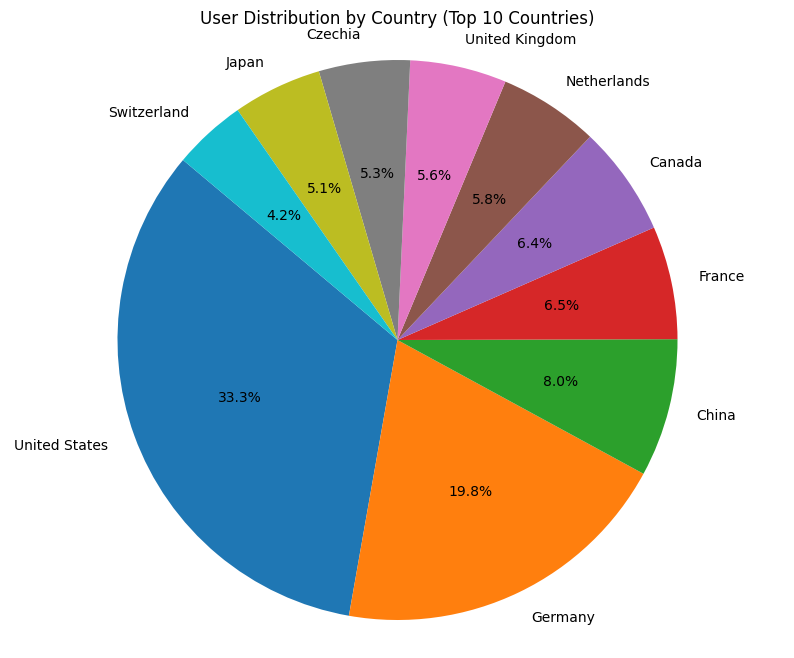

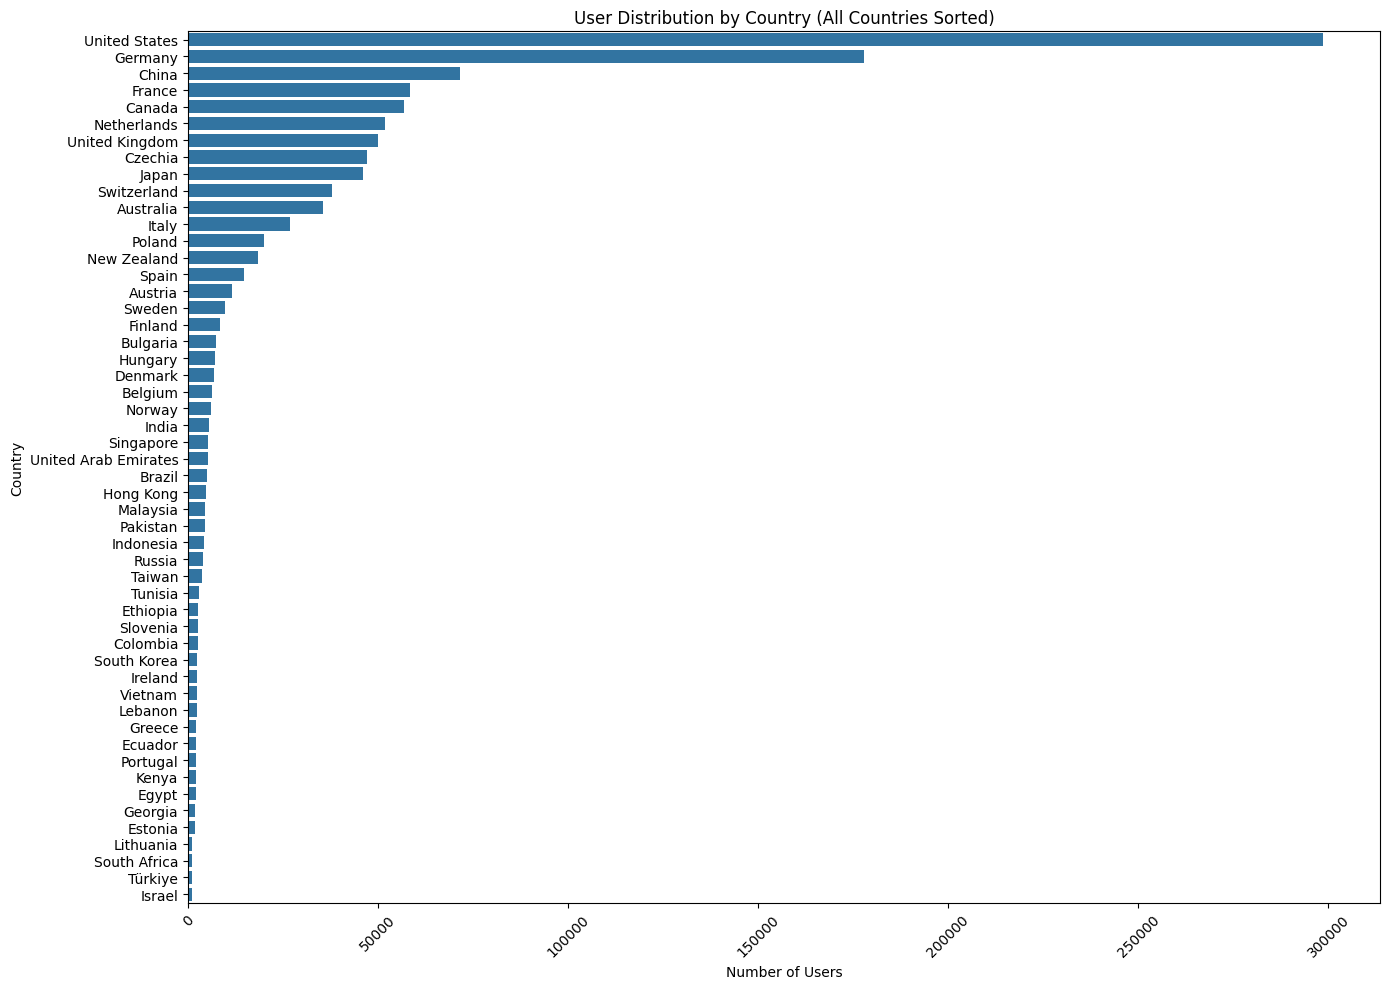

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('E:\\C\\数据工程\\user_data\\clean.csv')

# 确保country列没有缺失值，或者根据需要处理缺失值
# 例如，如果country列有缺失值，并且您选择填充它们
# df['country'].fillna('Unknown', inplace=True)  # 将缺失的country值填充为'Unknown'
# 注意：如果您选择删除缺失值，请在可视化之前执行此操作

# 统计每个国家和地区的用户数量
country_distribution = df['country'].value_counts().reset_index()
country_distribution.columns = ['country', 'user_count']
top_10_countries = country_distribution.sort_values(by='user_count', ascending=False).head(10)
 
# 绘制饼状图
plt.figure(figsize=(10, 8))  # 设定图形大小
plt.pie(top_10_countries['user_count'], labels=top_10_countries['country'], autopct='%1.1f%%', startangle=140)
plt.title('User Distribution by Country (Top 10 Countries)')
plt.axis('equal')  # 确保饼状图为正圆形
plt.show()
# 按用户数量降序排序
country_distribution = country_distribution.sort_values(by='user_count', ascending=False)

# 可视化结果
plt.figure(figsize=(14, 10))  # 可能需要调整图形大小以适应所有标签
sns.barplot(x='user_count', y='country', data=country_distribution)
plt.title('User Distribution by Country (All Countries Sorted)')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示长名称
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()

In [ ]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('E:\\C\\数据工程\\user_data\\clean.csv')

# 提取City信息，如果location只有一个字段（即可能是'Country'），则设置City为'Unknown'
def extract_city(location):
    parts = location.split(',')
    # 如果parts列表长度大于1，取第一部分作为城市；否则设置为'Unknown'
    if len(parts) > 1:
        city = parts[0].strip()
        return city
    else:
        return 'Unknown'

# 应用函数创建新列city
df['city'] = df['location'].apply(extract_city)

# 对city列进行标准化处理（注意：这里不再需要将None转换为'Unknown'，因为extract_city已经处理了）
def standardize_city(city):
    return city.strip().title()

# 由于extract_city已经确保了不会有None值（只会有'Unknown'字符串或有效的城市名），
# 我们可以安全地应用standardize_city函数，而不需要检查pd.notnull(city)
df['city'] = df['city'].apply(standardize_city)

# 显示处理后的数据，以验证结果
print(df.head())

# 保存处理后的数据到新的CSV文件
df.to_csv('E:\\C\\数据工程\\user_data\\processed.csv', index=False)

In [2]:
import pandas as pd
 
df = pd.read_csv('E:\\C\\数据工程\\user_data\\processed.csv')
 
# 获取City列中所有唯一的城市名
unique_cities = df['city'].unique()
 
# 打印出所有唯一的城市名
for city in unique_cities:
    print(city)

Houston
The Netherlands
Unknown
Brooklyn
Enschede
Utrecht
Acheron
Philadelphia
San Francisco
Hangzhou
Minneapolis
Grenoble
Cambridge
Boston
Sofia
Bothell
Turku
Vancouver
Ueda
Munich
Chengdu
Peking University
Paris
Germany
Berlin
Beijing
Zurich
Sunnyvale
London
Montreal
Wellington
Ghent
Tokyo
Kraków
Stuttgart
Las Vegas
Székesfehérvár
Little Rock
Maranello
Vienna
Los Angeles
Aaramoun
Troyes
Kanagawa
San Jose
Dubai
Lyon
Helsinki
Idaho Falls
Seattle
Cuenca
Toronto
Copenhagen
Kolkata
Amsterdam
Quebec
Weinheim
Redmond
Warsaw
Oxford
Hillsborough
Shanghai
Graz
Madrid
Dresden
New York
Dunedin
Toulouse
Glasgow
Berkeley
Wah Cantt
Nairobi
Winnipeg
Portland
Zürich
Earth
Austria
Arkansas
Appleton
Joinville
Kaiserslautern
Princeton
Canberra
Netherlands
Veliko Tarnovo
Mountain View
Sunshine Coast
Chongqing
Cupertino
Mikulov
Rosmalen
Kiel
Kilkenny
Athens
Wuppertal
Kunming
Karlsruhe
Chicago
Bandung
Oak Park
Phoenixville
Lützen
Budapest
Chn
Nuremberg
Mumbai
Islamabad
Melbourne
Forlì
Espoo
South Tyrol
Hot

Top 20 Cities by User Count:
Unknown: 644163 users
Palo Alto: 16149 users
Paris: 15433 users
Houston: 15409 users
Berlin: 14916 users
Tokyo: 14450 users
Montreal: 13112 users
London: 12467 users
New York: 11237 users
Enschede: 11185 users
San Francisco: 11150 users
Cambridge: 10695 users
Philadelphia: 9044 users
Amsterdam: 8480 users
Seattle: 8480 users
Hangzhou: 8466 users
Munich: 8412 users
Los Angeles: 8017 users
Zurich: 8011 users
Canberra: 7000 users


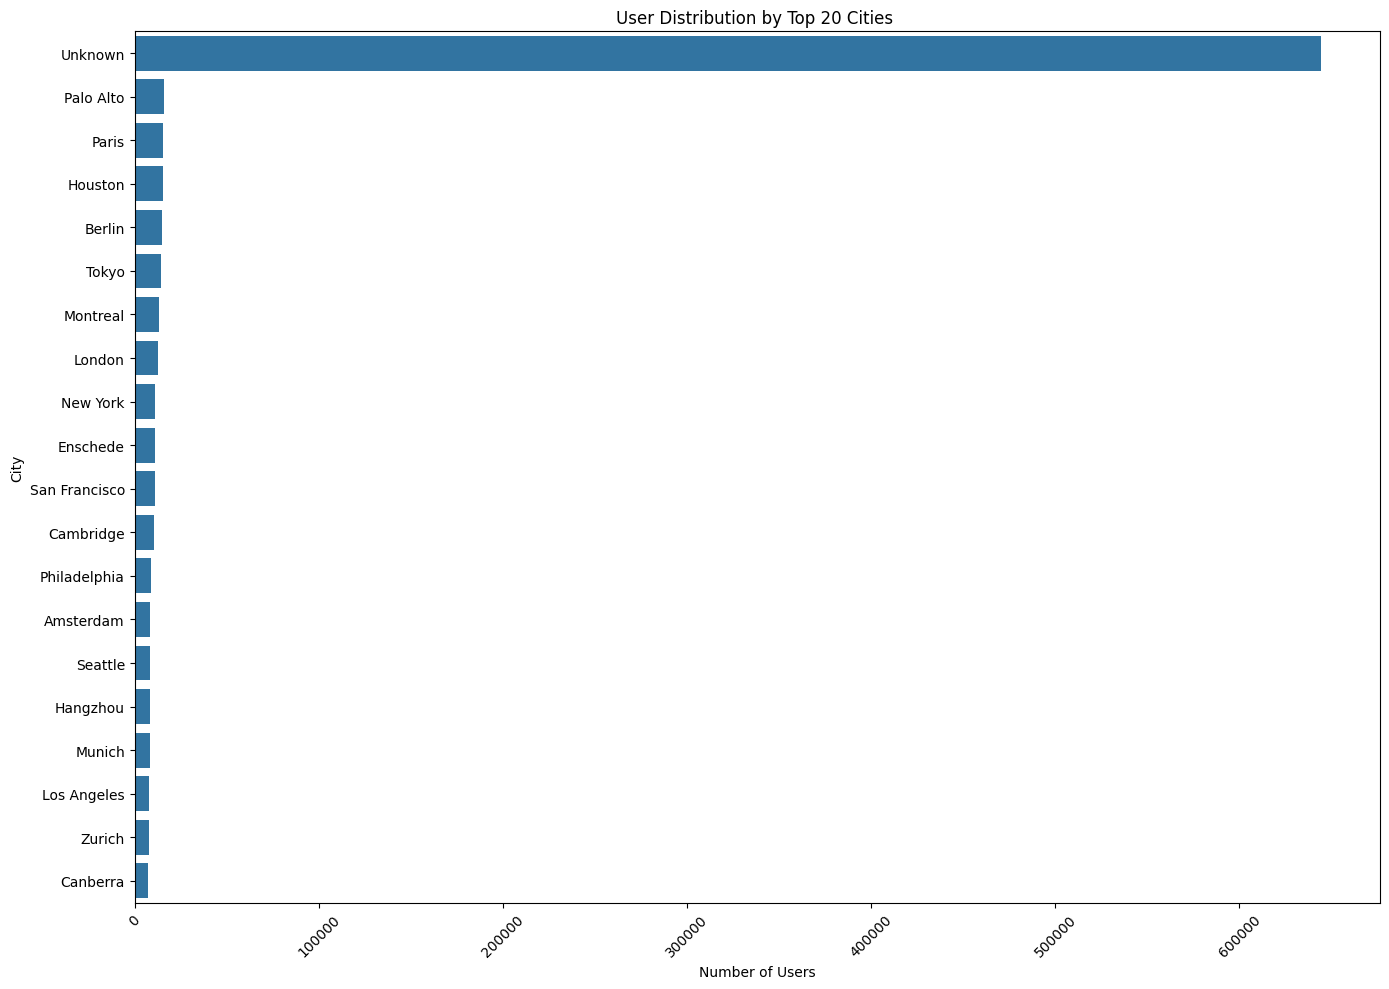

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('E:\\C\\数据工程\\user_data\\processed.csv')
df = df.dropna(subset=['city'])

# 统计每个城市的用户数量
city_distribution = df['city'].value_counts().reset_index()
city_distribution.columns = ['city', 'user_count']

# 按用户数量降序排序并截取前20个城市
top_20_cities = city_distribution.sort_values(by='user_count', ascending=False).head(20)
# 打印排名前20的城市名称
print("Top 20 Cities by User Count:")
for index, row in top_20_cities.iterrows():
    print(f"{row['city']}: {row['user_count']} users")
# 可视化结果
plt.figure(figsize=(14, 10))  # 可能需要调整图形大小以适应所有标签
sns.barplot(x='user_count', y='city', data=top_20_cities)
plt.title('User Distribution by Top 20 Cities ')
plt.xlabel('Number of Users')
plt.ylabel('City')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示长名称
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()

In [5]:
import pandas as pd
import plotly.express as px

# 读取数据
df = pd.read_csv('E:\\C\\数据工程\\user_data\\processed.csv')

# 假设location列已经包含了城市名，或者你已经通过某种方式提取了城市名
# 如果location是完整的地址，你需要先提取城市名
# 例如，使用正则表达式：city = df['location'].str.extract(r'(?P<city>\w+,\s*\w+\s*\w*)')['city'].str.split(', ').str[-1]
# 但这里我们直接假设location列是城市名

df = df.dropna(subset=['city'])
# 统计每个城市的开发者数量
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'developer_count']

# 为了在Plotly中使用，我们需要一个包含城市经纬度的DataFrame
# 这通常需要一个地理编码API（如Google Maps API）来获取城市的经纬度
# 但为了示例，我将创建一个假的DataFrame，其中包含一些城市的经纬度
# 在实际应用中，你需要替换这部分代码以获取真实的经纬度数据
fake_geo_data = {
    'city': ['Palo Alto', 'Paris', 'Houston', 'Berlin', 'Tokyo', 'Montreal', 'London', 'New York', 'Enschede', 'San Francisco'],
    'lat': [37.4419, 48.8566, 29.7604, 52.5200, 35.6895, 45.5017, 51.5074, 40.7128, 52.1347, 37.7749],
    'lon': [-122.1431, 2.3522, -95.3698, 13.4049, 139.6917, -73.5673, -0.1278, -74.0060, 6.8917, -122.4194]
}
# 创建一个DataFrame来存储经纬度数据
geo_data = pd.DataFrame(fake_geo_data)
# 使用merge函数并指定indicator=True来标识合并结果
merged_with_indicator = pd.merge(geo_data, city_counts, on='city', how='outer', indicator=True)
 
# 筛选出仅在geo_data中存在的城市（即_merge列为'left_only'的行）
cities_in_geo_not_in_city_counts = merged_with_indicator[merged_with_indicator['_merge'] == 'left_only']
 
# 输出这些城市
print(cities_in_geo_not_in_city_counts['city'])
# 将城市计数数据与经纬度数据合并
merged_data = pd.merge(city_counts, geo_data, on='city', how='left').fillna(0)

# 由于我们的示例数据不完整，我们可能需要过滤掉没有经纬度信息的城市
merged_data = merged_data[merged_data['lat'] != 0]
#merged_data = pd.merge(city_counts, geo_data, on='city', how='left').fillna({'lat': 0, 'lon': 0})
# 使用Plotly生成热力图
fig = px.density_mapbox(merged_data, lat='lat', lon='lon', z='developer_count', radius=10,
                        center=dict(lat=37.7749, lon=-122.4194),  # 地图中心（例如，美国旧金山）
                        zoom=3, mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Series([], Name: city, dtype: object)


In [6]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('E:\\C\\数据工程\\user_data\\processed.csv')

# 解析 event_time 列，将其转换为带时区信息的 datetime 对象
# 确保你的 Pandas 版本支持自动解析时区信息
df['event_time'] = pd.to_datetime(df['event_time'])

# 检查 event_time 列的类型，确保它是 datetime64[ns, tz] 类型
print(df['event_time'].dtype)

# 如果 event_time 已经是 datetime64[ns, tz] 类型，你可以直接提取时区信息
# 注意：这里我们假设所有时间戳都有相同的时区格式，并且 Pandas 已经正确解析了时区
if 'tz' in df['event_time'].dtype.name:
    # 提取时区偏移量（以小时和分钟为单位）
    df['timezone_offset'] = df['event_time'].dt.tzinfo.utcoffset().astype('timedelta64[h]').astype(int).astype(str) + ':' + \
        (df['event_time'].dt.tzinfo.utcoffset().astype('timedelta64[m]') % 60).astype(str).zfill(2)

    # 分析时区分布
    timezone_distribution = df['timezone_offset'].value_counts().sort_index()
    print("Timezone Distribution:")
    print(timezone_distribution)

    # 将时间戳转换为 UTC 时间，然后再根据需要转换为其他时区（这里我们直接转换为本地时间，即去除时区信息）
    # 注意：这一步可能不是必需的，取决于你想要分析的内容
    df['utc_time'] = df['event_time'].dt.tz_convert('UTC')
    df['local_time'] = df['utc_time'].dt.tz_localize(None)  # 去除时区信息，转换为 naive datetime 对象

    # 分析协作时间模式（例如，按小时统计事件数量）
    # 注意：这里使用的是 local_time，它已经是 naive datetime 对象，没有时区信息
    hour_distribution = df['local_time'].dt.hour.value_counts().sort_index()
    print("\nHourly Distribution of Events:")
    print(hour_distribution)
else:
    print("The event_time column does not contain timezone information.")

datetime64[ns, UTC+08:00]
The event_time column does not contain timezone information.


In [9]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('E:\\C\\数据工程\\user_data\\processed.csv', parse_dates=['event_time'])  # 确保event_time列被解析为datetime对象


# 统计每个用户的提交次数
submission_counts = df.groupby('user_id').size().reset_index(name='submission_count')

# 设定活跃阈值（例如，提交次数超过10次的用户被视为高活跃用户）
# 这个阈值应该根据你的实际数据和业务需求来设定
threshold = 2000

# 识别高活跃用户和低活跃用户
submission_counts['user_activity_level'] = pd.cut(submission_counts['submission_count'],
                                                 bins=[0, threshold, submission_counts['submission_count'].max()],
                                                 labels=['Low Activity', 'High Activity'])

# 打印结果
print(submission_counts)

# 如果你只想获取高活跃用户的列表，可以使用以下代码
high_activity_users = submission_counts[submission_counts['user_activity_level'] == 'High Activity']
#print(high_activity_users)

       user_id  submission_count user_activity_level
0          225              2862       High Activity
1         1945              1518        Low Activity
2         2621               792        Low Activity
3         4196              1951        Low Activity
4         9582              2258       High Activity
..         ...               ...                 ...
492   91018726              3950       High Activity
493   92015510              1863        Low Activity
494   95597335              2111       High Activity
495  100913391              3165       High Activity
496  112826355              1583        Low Activity

[497 rows x 3 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14308\1958686115.py:27: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



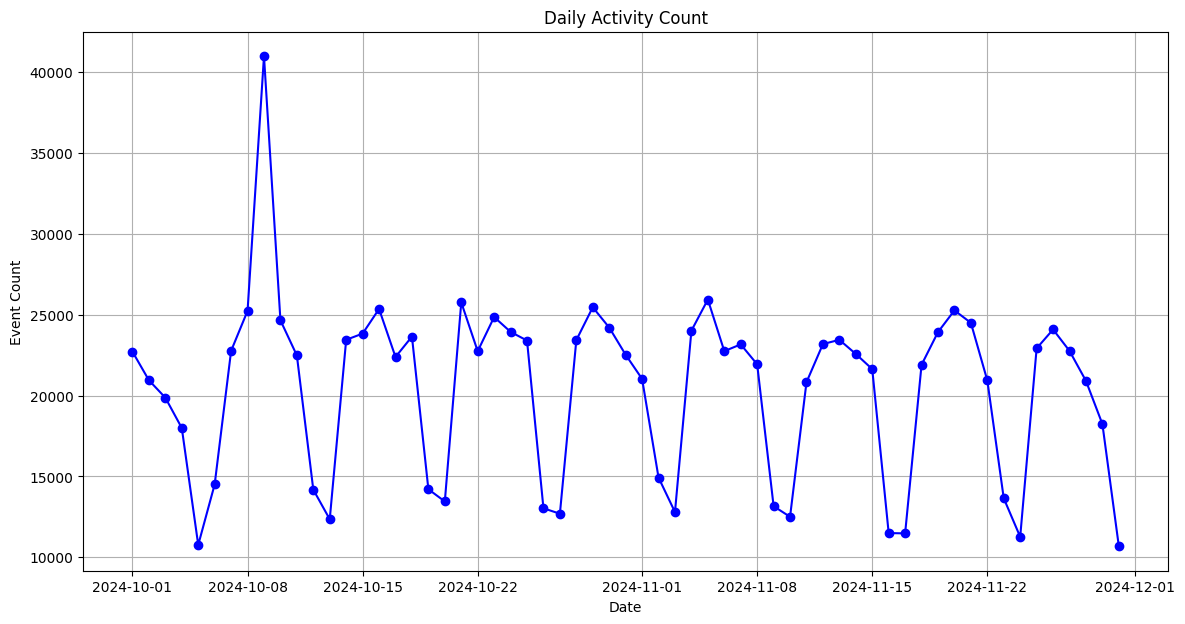

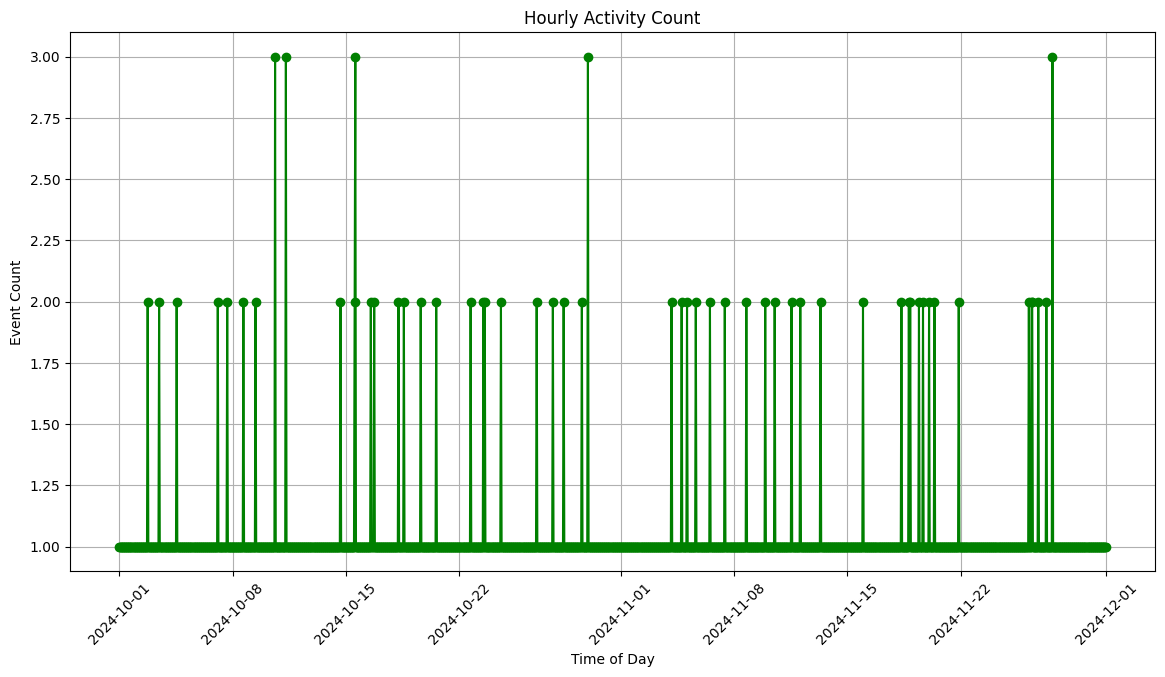

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV数据
data = pd.read_csv('E:\\C\\数据工程\\user_data\\processed.csv')  # 替换为你的CSV文件路径

# 转换event_time列为datetime类型，并设置为DataFrame的索引（可选，但有助于时间分析）
data['event_time'] = pd.to_datetime(data['event_time'])
data.set_index('event_time', inplace=True)

# 每日活跃度分析
daily_activity = data.resample('D').size()  # 按天重新采样并计数

# 小时活跃度分析（首先需要将时间戳重置为仅包含日期和小时的信息）
# 为了正确计算小时活跃度，我们需要确保每个小时都有一个条目，即使该小时没有活动。
# 这可以通过创建一个完整的时间序列并合并原始数据来实现。

# 获取数据中的时间范围
start_time = data.index.min().replace(hour=0, minute=0, second=0, microsecond=0)
end_time = data.index.max().replace(hour=23, minute=59, second=59, microsecond=999999)

# 创建一个完整的时间序列（每小时一个条目）
all_hours = pd.date_range(start=start_time, end=end_time, freq='h')  # 使用小写 'h'

# 使用merge将原始数据与完整时间序列合并，并用0填充缺失值（表示该小时没有活动）
# 注意：这里不需要 dropna，因为我们想要保留所有小时，即使它们没有对应的活动
hourly_activity = pd.merge(pd.DataFrame(all_hours, columns=['event_time']), data, on='event_time', how='left').groupby(pd.Grouper(key='event_time', freq='H')).size().fillna(0)

# 可视化每日活跃度
plt.figure(figsize=(14, 7))
plt.plot(daily_activity.index, daily_activity.values, marker='o', linestyle='-', color='b')
plt.title('Daily Activity Count')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.grid(True)
plt.show()

# 可视化小时活跃度
plt.figure(figsize=(14, 7))
plt.plot(hourly_activity.index, hourly_activity.values, marker='o', linestyle='-', color='g')
plt.title('Hourly Activity Count')
plt.xlabel('Time of Day')
plt.ylabel('Event Count')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示
plt.show()

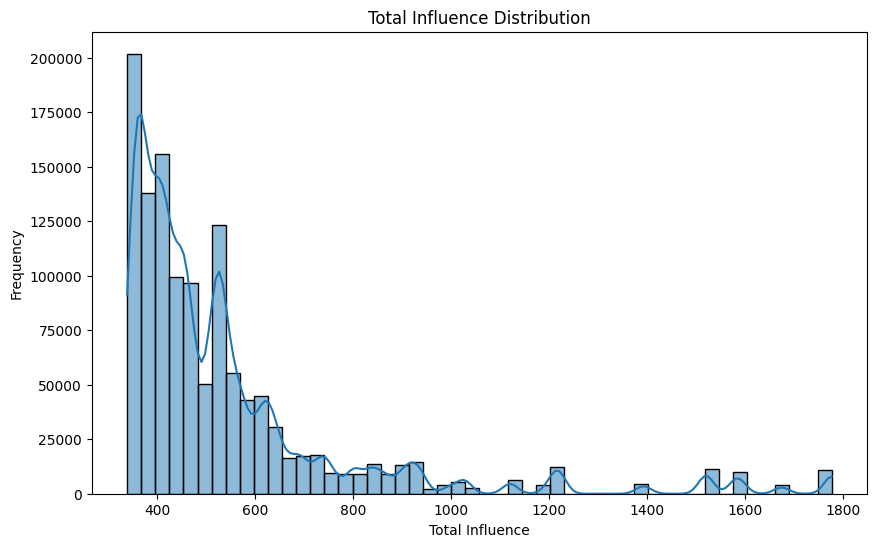

Top 10 users by total influence:
   user_id    name  total_influence
0   663432  bdraco      1776.967163
1   663432  bdraco      1776.967163
2   663432  bdraco      1776.967163
3   663432  bdraco      1776.967163
4   663432  bdraco      1776.967163
5   663432  bdraco      1776.967163
6   663432  bdraco      1776.967163
7   663432  bdraco      1776.967163
8   663432  bdraco      1776.967163
9   663432  bdraco      1776.967163


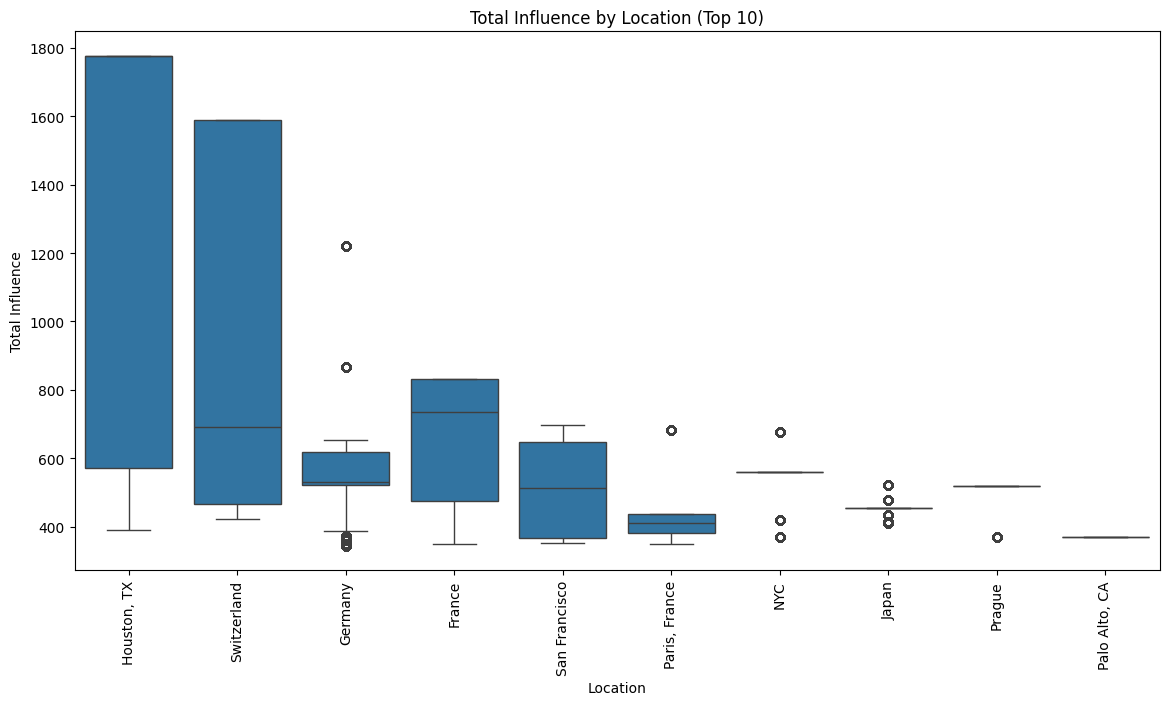

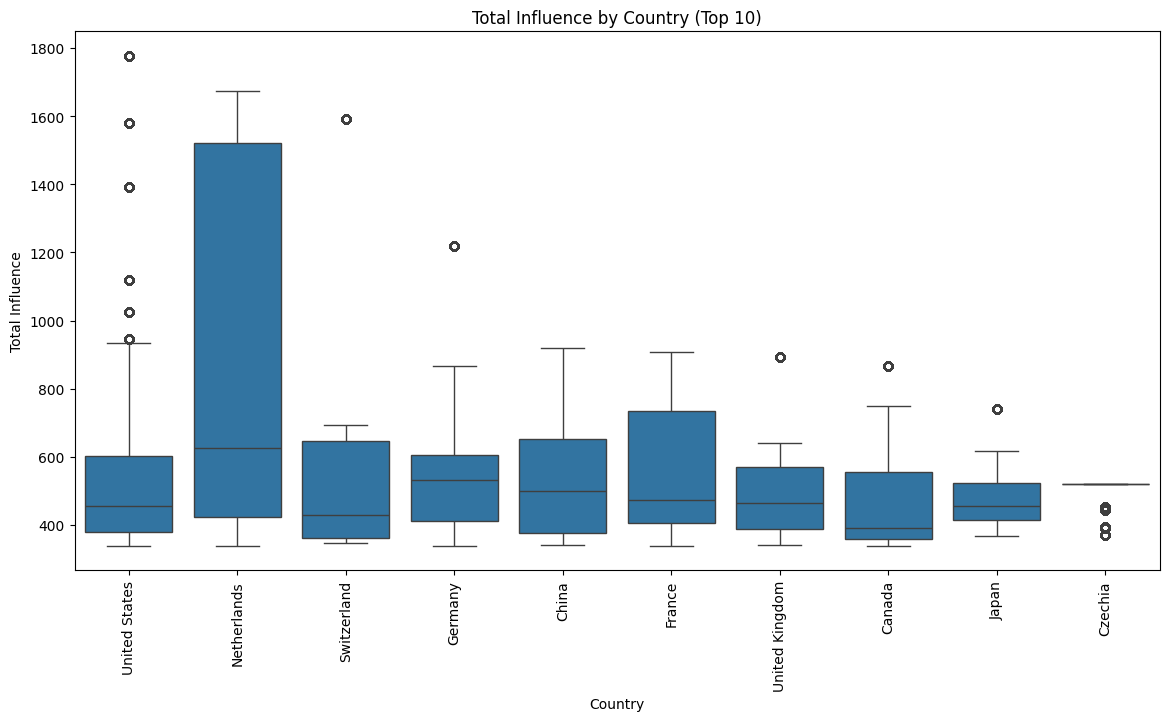

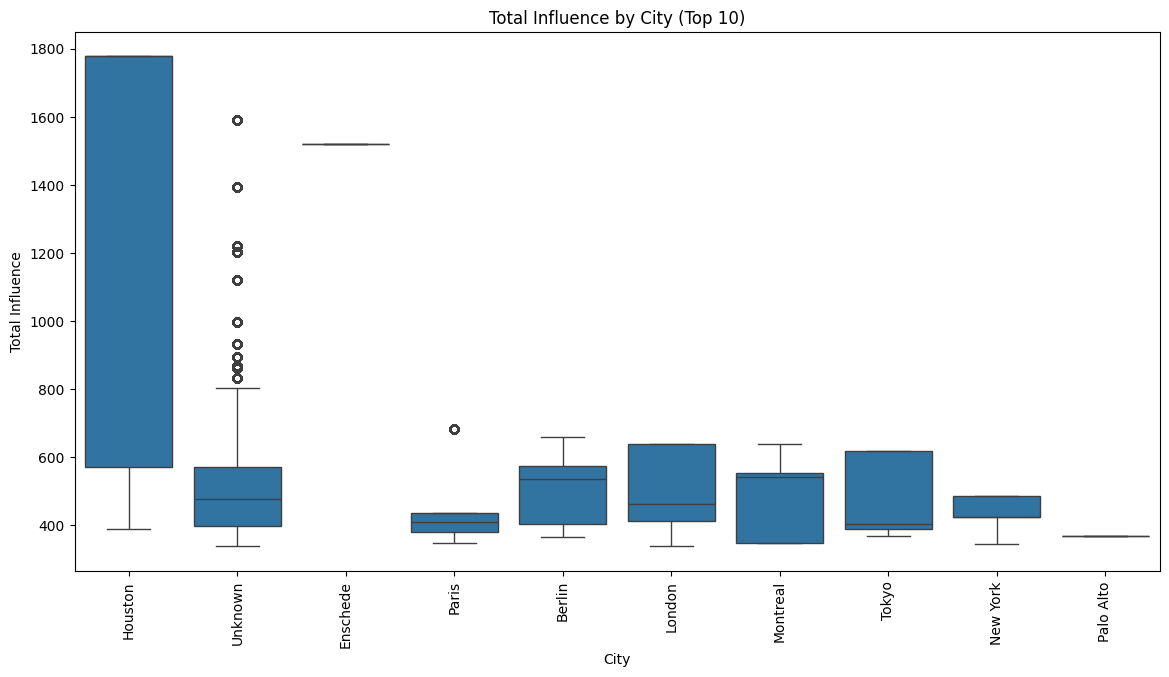

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = 'E:\\C\\数据工程\\user_data\\processed.csv'  # 请替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 总影响力分布分析
def analyze_total_influence_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_influence'], bins=50, kde=True)
    plt.title('Total Influence Distribution')
    plt.xlabel('Total Influence')
    plt.ylabel('Frequency')
    plt.show()

    # 找出影响力较高的用户（例如前10名）
    top_users = df.nlargest(10, 'total_influence')
    print("Top 10 users by total influence:")
    print(top_users[['user_id', 'name', 'total_influence']])


# 影响力与用户属性关系分析（修改版）
def analyze_influence_user_attributes(df):
    def plot_top_n_categories(column, n=10):
        # 获取前n个最常见分类
        top_n_categories = df[column].value_counts().head(n).index
        # 过滤数据以仅包含这些分类
        filtered_df = df[df[column].isin(top_n_categories)]
        
        # 绘制箱线图
        plt.figure(figsize=(14, 7))
        sns.boxplot(x=column, y='total_influence', data=filtered_df)
        plt.xticks(rotation=90)
        plt.title(f'Total Influence by {column.capitalize()} (Top {n})')
        plt.xlabel(column.capitalize())
        plt.ylabel('Total Influence')
        plt.show()
    
    # 按location分析
    plot_top_n_categories('location')
    
    # 按country分析
    plot_top_n_categories('country')
    
    # 按city分析
    plot_top_n_categories('city')

# 执行分析
analyze_total_influence_distribution(df)
analyze_influence_user_attributes(df)